## 经纬度转圆盘

In [1]:
from fy4a import AGRI_L1
import numpy
import xarray
import matplotlib.pyplot as plt
from projection import latlon2linecolumn

In [2]:
geo_desc = [-59.99, 60, 44, 163.99, 0.01]
lat_S, lat_N, lon_W, lon_E, step = [1000 * x for x in geo_desc]

In [3]:
lat = numpy.arange(lat_N, lat_S-1, -step) / 1000
lon = numpy.arange(lon_W, lon_E+1, step) / 1000
lon_mesh, lat_mesh = numpy.meshgrid(lon, lat)

In [4]:
line, column = latlon2linecolumn(lat_mesh, lon_mesh, '1000M')

In [11]:
line= line.astype(int)
column= column.astype(int)

In [7]:
tif_path = '/disk2/workspace/20230509/FY4A-_AGRI--_N_DISK_1047E_L1-_FDI-_MULT_NOM_20210619030000_20210619031459_1000M_V0001.tif'
tif_ds = xarray.open_rasterio(tif_path)
lonlat_v = numpy.array(tif_ds)[0]

/home/beichen/anaconda3/envs/master_research/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


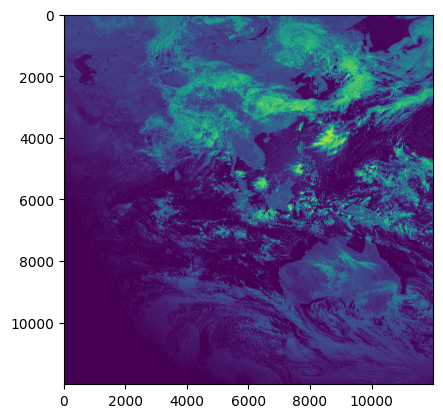

In [16]:
plt.imshow(lonlat_v)

In [26]:
data = numpy.full((10992,10992), numpy.nan)
for i in range(10992):
    for j in range(10992):
        data[line[i,j],column[i][j]] = lonlat_v[i][j]

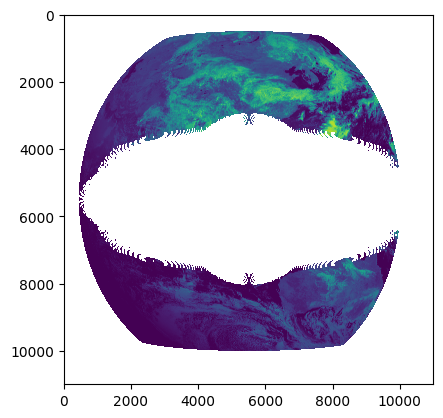

In [27]:
plt.imshow(data, interpolation=None)
plt.savefig('/disk2/workspace/20230730/latlon2fd_AGRI.png', dpi=1000)